$$\dot{M} = \int \rho v_r \Delta S $$

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
cd ~/gscratch/athena_2/mri_hi_res/

/global/scratch2/sd/dorislee/athena_2/mri_hi_res


In [7]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

In [28]:
tstep_filename  = "mri_hires_smaller.out1.00085.ath"

In [11]:
import h5py
import glob
debug =True
if debug: print "Working on {}".format(tstep_filename) 
hdf5 = h5py.File(tstep_filename, 'r+')
NUM_MESHBLOCK=96
D = np.zeros(128)

Working on gid_random_init.out1.00002.ath


In [31]:
meshblock =hdf5["MeshBlock9"]

192x128x128 $\rightarrow 32^3 \rightarrow$ each meshblock is 6x4x4

In [51]:
def compute_mass_accretion(tstep_filename):
    debug =True
    if debug: print "Working on {}".format(tstep_filename) 
    hdf5 = h5py.File(tstep_filename, 'r+')
    NUM_MESHBLOCK=96
    D = np.zeros(128)
    for M in np.arange(NUM_MESHBLOCK):
    #     print "Working on MeshBlock {}".format(M)
        meshblock =hdf5["MeshBlock{}".format(M)]
        density= meshblock["rho"].value#density for each meshblock
        N_r = density.shape[2]
        N_theta=density.shape[1]
        N_phi= density.shape[0]
        x1f = meshblock["x1f"].value
        x2f = meshblock["x2f"].value
        x3f = meshblock["x3f"].value
        vr = meshblock["vel1"].value
        loc = meshblock.attrs["LogicalLocation"]
    #     for rii in np.arange(N_r):
    #         phi_i =n+32*loc[2]
            #Compute D_i in each meshblock
    #         if rii = 0
        if (loc[0]==0):
            rii=0 # we only want the mass flux onto the inner most cell
            val=0 #val=integrand to sum over rho*vr*dS
            ri = (x1f[rii]+x1f[rii+1])*0.5
            dri = abs(x1f[rii]-x1f[rii+1])
            for ti in np.arange(N_theta):
                tii =ti+32*loc[2]
                thetai = (x2f[ti]+x2f[ti+1])*0.5
                dthetai = abs(x2f[ti]-x2f[ti+1])
                for pii in np.arange(N_phi):
                    dphii=abs(x3f[ti]-x3f[ti+1])
                    dS= ri*sin(thetai)*dri*dphii
                    val = val +density[pii,ti,rii]*vr[pii,ti,rii]*dS
                D[tii]=D[tii]+val
    return sum(D)

Verified that the values look corrected (compared with the momentum x1 plotted in VisIt spreadsheet )

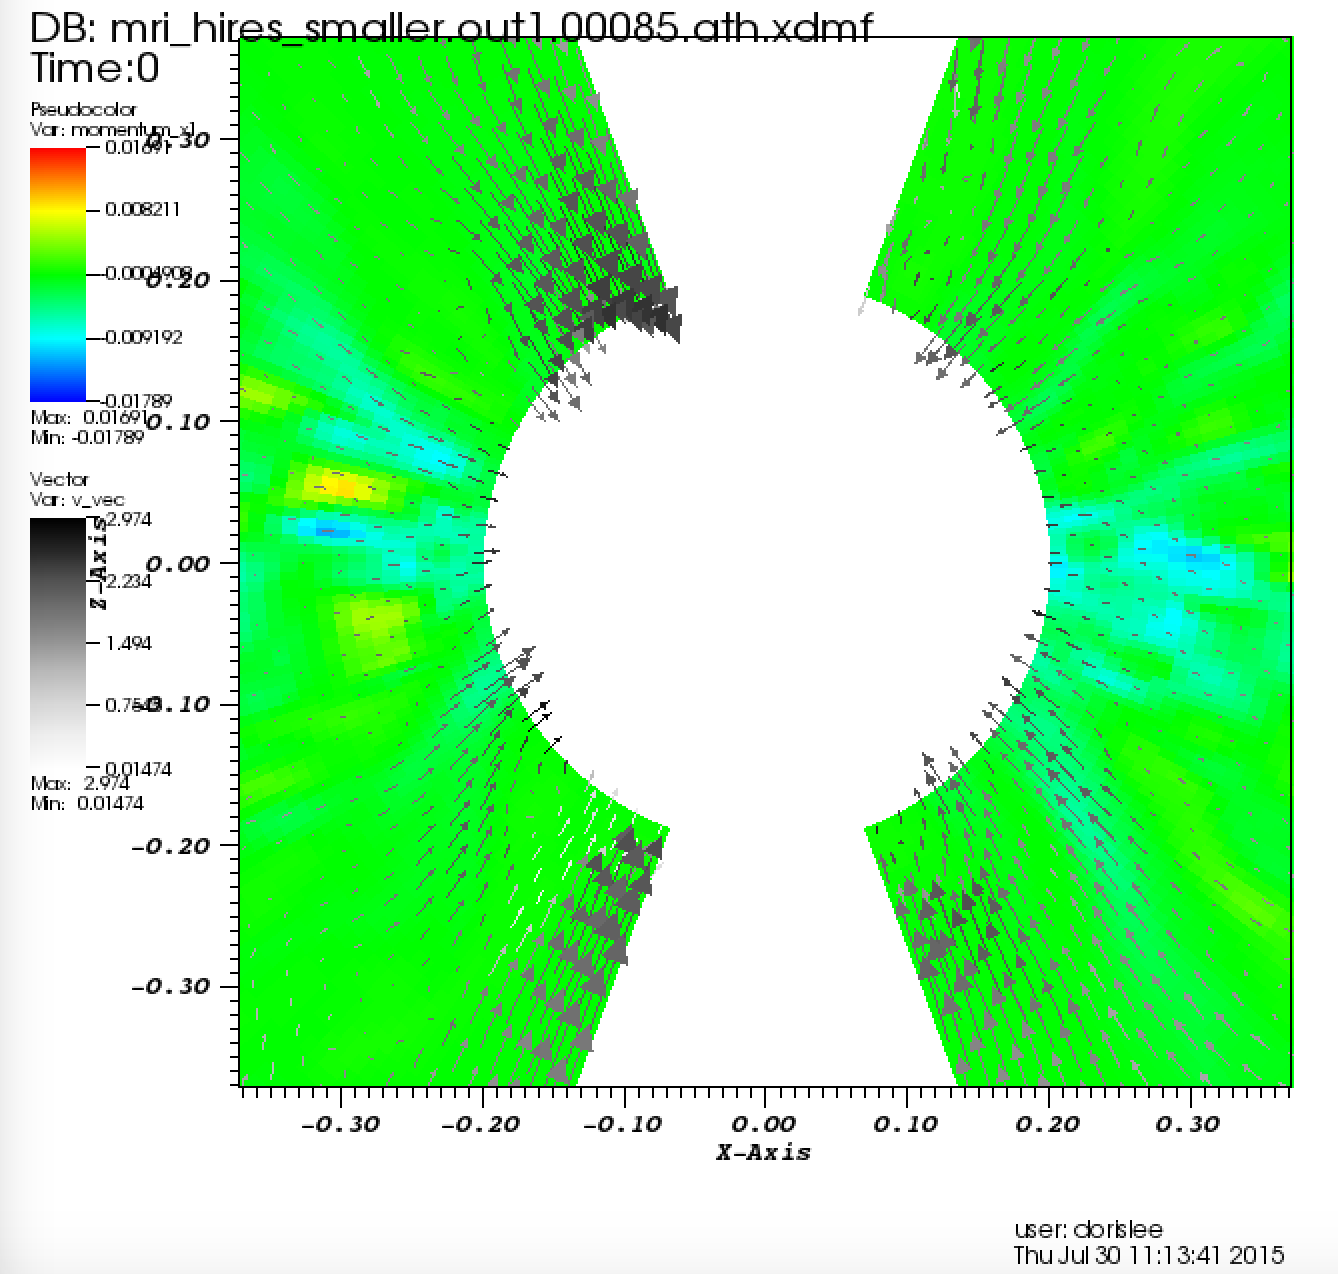

In [49]:
from IPython.core.display import Image
Image(filename="/global/homes/d/dorislee/usrp/notes/Week6/Screen Shot 2015-07-30 at 11.14.15 AM.png",width=500)

In [46]:
print "Mass accretion rate: ", sum(D)

Mass accretion rate:  -0.0592378218406


### Mass accretion History for MRI 

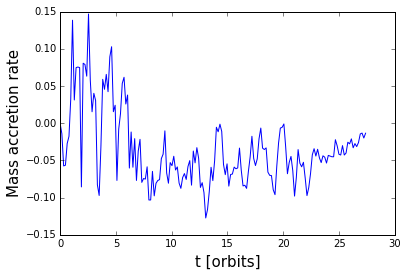

In [8]:
mdot = np.loadtxt("mdot.txt")
t_orbits  = np.arange(len(mdot))/2./np.pi
plt.plot(t_orbits,mdot)
plt.ylabel("Mass accretion rate",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)

#### Mass accretion History for PPI

In [9]:
cd ../fixed_initialization/

/global/scratch2/sd/dorislee/athena_2/fixed_initialization


In [12]:
# tstep_filename = "gid_random_init.out1.00002.ath"
# hdf5 = h5py.File(tstep_filename, 'r+')
# hdf5.values()

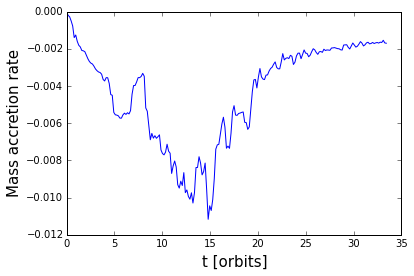

In [24]:
mdot = np.loadtxt("mdot.txt")
t_orbits  = np.arange(len(mdot))/2./np.pi
plt.plot(t_orbits,mdot)
plt.ylabel("Mass accretion rate",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)

### Overplotted 

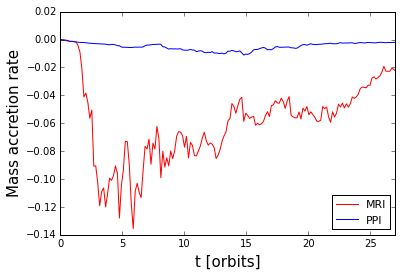

In [32]:
from matplotlib.legend_handler import HandlerLine2D
mdot_mri = np.loadtxt("../mri_hi_res/mdot.txt")
mdot_ppi = np.loadtxt("../fixed_initialization/mdot.txt")
t_orbits_mri  = np.arange(len(mdot_mri))/2./np.pi
t_orbits_ppi  = np.arange(len(mdot_ppi))/2./np.pi
plt.plot(t_orbits_mri,mdot_mri,label = "MRI",color="red")
plt.plot(t_orbits_ppi,mdot_ppi,label="PPI")
plt.ylabel("Mass accretion rate",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
plt.xlim(0,27)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
plt.savefig("mass_accretion.pdf",fmt="pdf")

~~We actually see larger mass accretion rate in the PPI case, One possible reason why this is the case is that the size of our computational domain is different so the available amount of gas on both sides may be different~~

The values are negative, which doesn't make a lot of sense. But in visit the momentum x_1 is negative too because the velocity x_1 is negative. This is correct because r increases from inside to outside so then negative means that velocity is pointing towards inside (i.e. accreting inwards) 

In [34]:
mv mass_accretion.pdf /global/homes/d/dorislee/usrp/report/plots/